# Phishing Websites
CSE4063 - Data Mining Project-1

**Phishing Websites Data Set**  
http://archive.ics.uci.edu/ml/datasets/Phishing+Websites

In [1]:
# import packages
!pip install liac-arff
import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  Created wheel for liac-arff: filename=liac_arff-2.4.0-py3-none-any.whl size=13333 sha256=470115c4ec2fb9b66ffb57295cb792133f2466c747ffb8a15656465ed36b723f
  Stored in directory: /root/.cache/pip/wheels/db/b2/8d/8737daed1b77ee2e9e834da36b2213d6e439bf42d82ce5e911
Successfully built liac-arff


In [2]:
# read dataset
data = arff.load(open('../input/phising-website/Training Dataset.arff'))

# build dataframe
column_names = list(list(zip(*data['attributes']))[0])
df = pd.DataFrame(data['data'], columns=column_names)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

TOTAL COUNT: 11055
POSITIVE COUNT: 6157
NEGATIVE COUNT: 4898



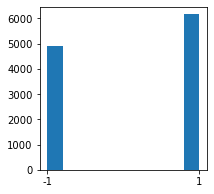

In [4]:
# number of classes
plt.figure(figsize =(3,3))
plt.hist(df.Result)
total_count = len(df)
pos_count = df.loc[df['Result'] == '1', 'Result'].count()
neg_count = df.loc[df['Result'] == '-1', 'Result'].count()
print("TOTAL COUNT: {}\nPOSITIVE COUNT: {}\nNEGATIVE COUNT: {}\n".format(total_count,pos_count,neg_count))

# Preprocessing

In [5]:
# Look for missing values
print(df.isnull().sum())  

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

So no missing values.

Also they are not integer type so we need to convert them.

In [6]:
# convert values to integer from string
df = df.astype(int)

Also all values are 1, -1 or 0 so no need to normalize them.

# CLASSIFICATION

In [7]:
# import sklearn methods 
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
import sys 
import os
sys.path.append(os.path.abspath("../input/raczeq/c45/"))
from c45 import C45
from sklearn.model_selection import learning_curve

In [8]:
# split df to X and Y
y = df.loc[:, 'Result'].values
X = df.loc[:, column_names[:-1]]

In [9]:
# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# cross-validation with 5 splits
cv = StratifiedShuffleSplit(n_splits=5, random_state = 42)

**Classifier-1: Decision Tree CART**

In [10]:
# CART decision tree
cart = DecisionTreeClassifier(random_state = 0)

# parameters 
parameters = {
                "criterion": ["gini","entropy"],
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                }

# grid search for parameters
grid = GridSearchCV(estimator=cart, param_grid=parameters, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'class_weight': 'balanced', 'criterion': 'gini', 'splitter': 'random'} with a score of 0.9632


In [11]:
# detailed dataframe of gridsearch
detailed_grid_results = pd.DataFrame(grid.cv_results_)
detailed_grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035847,0.000784,0.002019,0.000083,None,gini,best,"{'class_weight': None, 'criterion': 'gini', 's...",0.963842,0.954802,0.949153,0.954802,0.962712,0.957062,0.005489,8
1,0.030097,0.001780,0.002033,0.000115,None,gini,random,"{'class_weight': None, 'criterion': 'gini', 's...",0.964972,0.958192,0.948023,0.954802,0.966102,0.958418,0.006681,6
2,0.032353,0.000947,0.002009,0.000078,None,entropy,best,"{'class_weight': None, 'criterion': 'entropy',...",0.963842,0.958192,0.950282,0.960452,0.968362,0.960226,0.006039,4
3,0.029961,0.000434,0.002010,0.000113,None,entropy,random,"{'class_weight': None, 'criterion': 'entropy',...",0.967232,0.963842,0.946893,0.957062,0.972881,0.961582,0.008954,2
4,0.038105,0.000674,0.002069,0.000129,balanced,gini,best,"{'class_weight': 'balanced', 'criterion': 'gin...",0.959322,0.957062,0.950282,0.958192,0.964972,0.957966,0.004708,7
5,0.034805,0.000621,0.002053,0.000092,balanced,gini,random,"{'class_weight': 'balanced', 'criterion': 'gin...",0.969492,0.962712,0.955932,0.959322,0.968362,0.963164,0.005183,1
6,0.039881,0.001695,0.002040,0.000096,balanced,entropy,best,"{'class_weight': 'balanced', 'criterion': 'ent...",0.967232,0.960452,0.949153,0.958192,0.970621,0.961130,0.007482,3
7,0.035842,0.002095,0.001855,0.000325,balanced,entropy,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.966102,0.959322,0.952542,0.957062,0.964972,0.960000,0.005033,5


In [12]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = ""
    str_out += ("TEST SCORES\n")
    str_out += ("\n")

    #print accuracy
    accuracy = accuracy_score(test, pred)
    str_out += ("ACCURACY: {:.4f}\n".format(accuracy))
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")

    #print confusion matrix
    str_out += ("CONFUSION MATRIX:\n")
    conf_mat = confusion_matrix(test, pred)
    str_out += ("{}".format(conf_mat))
    str_out += ("\n")
    str_out += ("\n")

    #print FP, FN
    str_out += ("FALSE POSITIVES:\n")
    fp = conf_mat[1][0]
    pos_labels = conf_mat[1][0]+conf_mat[1][1]
    str_out += ("{} out of {} positive labels ({:.4f}%)\n".format(fp, pos_labels,fp/pos_labels))
    str_out += ("\n")

    str_out += ("FALSE NEGATIVES:\n")
    fn = conf_mat[0][1]
    neg_labels = conf_mat[0][1]+conf_mat[0][0]
    str_out += ("{} out of {} negative labels ({:.4f}%)\n".format(fn, neg_labels, fn/neg_labels))
    str_out += ("\n")

    #print classification report
    str_out += ("PRECISION, RECALL, F1 scores:\n")
    str_out += ("{}".format(classification_report(test, pred)))
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

In [13]:
# prediction results
y_pred = grid.predict(X_test)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

TEST SCORES

ACCURACY: 0.9548

AUC: 0.9539

CONFUSION MATRIX:
[[ 927   53]
 [  47 1184]]

FALSE POSITIVES:
47 out of 1231 positive labels (0.0382%)

FALSE NEGATIVES:
53 out of 980 negative labels (0.0541%)

PRECISION, RECALL, F1 scores:
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       980
           1       0.96      0.96      0.96      1231

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



**Classifier-2: Decision Tree C4.5**  
Since there's no C4.5 implementation on sklearn, we used https://github.com/RaczeQ/scikit-learn-C4.5-tree-classifier

In [14]:
# C4.5 classifier
clf = C45(attrNames=column_names[:-1])
clf.fit(X_train, y_train)

# prediction results
y_pred = clf.predict(X_test)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

TEST SCORES

ACCURACY: 0.9647

AUC: 0.9632

CONFUSION MATRIX:
[[ 931   49]
 [  29 1202]]

FALSE POSITIVES:
29 out of 1231 positive labels (0.0236%)

FALSE NEGATIVES:
49 out of 980 negative labels (0.0500%)

PRECISION, RECALL, F1 scores:
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       980
           1       0.96      0.98      0.97      1231

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



**Classifier-3: Naive-Bayes**  
Since multinomial and categorical NB implementations doesn't work with negative values, an extra preprocessing step which converts (-1,0,1) to (0, 1, 2), is included here.

For other classifiers (DT, SVM and NN) original values work better so we won't use converted values X_ord and y_ord for them.

In [15]:
# extra preprocessing step for NB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
ol = OrdinalEncoder()
X_ord = ol.fit_transform(X)

le = LabelEncoder()
y_ord = le.fit_transform(y)

In [16]:
# split data into 80-20 for training set / test set
X_ord_train, X_ord_test, y_ord_train, y_ord_test = train_test_split(X_ord, y_ord, test_size = 0.2)

# cross-validation with 5 splits
cv = StratifiedShuffleSplit(n_splits=5, random_state = 42)

In [17]:
# Naive-Bayes with different approaches
nb_list = [ GaussianNB(), MultinomialNB(), ComplementNB(), CategoricalNB() ]

for nb in nb_list:
    print("############", str(nb), "############")
    # parameters 
    parameters = {}

    # grid search for parameters
    grid = GridSearchCV(estimator=nb, param_grid=parameters, cv=cv, n_jobs=-1)
    grid.fit(X_ord_train, y_ord_train)

    # print best scores
    print("The best parameters are %s with a score of %0.4f\n"
          % (grid.best_params_, grid.best_score_))

    # prediction results
    y_ord_pred = grid.predict(X_ord_test)

    # print accuracy metrics
    results, false = display_test_scores(y_ord_test, y_ord_pred)
    print(results)

############ GaussianNB(priors=None, var_smoothing=1e-09) ############
The best parameters are {} with a score of 0.6237

TEST SCORES

ACCURACY: 0.6314

AUC: 0.6604

CONFUSION MATRIX:
[[1006    4]
 [ 811  390]]

FALSE POSITIVES:
811 out of 1201 positive labels (0.6753%)

FALSE NEGATIVES:
4 out of 1010 negative labels (0.0040%)

PRECISION, RECALL, F1 scores:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1010
           1       0.99      0.32      0.49      1201

    accuracy                           0.63      2211
   macro avg       0.77      0.66      0.60      2211
weighted avg       0.79      0.63      0.59      2211

############ MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) ############
The best parameters are {} with a score of 0.8755

TEST SCORES

ACCURACY: 0.8684

AUC: 0.8618

CONFUSION MATRIX:
[[ 794  216]
 [  75 1126]]

FALSE POSITIVES:
75 out of 1201 positive labels (0.0624%)

FALSE NEGATIVES:
216 out of 

Best results are obtained with CategoricalNB() with accuracy of 92,22%.

**Classifier-4: SVM**

In [18]:
# SVM classifier
svm = SVC(tol=1e-5)

# parameters 
parameters = {
                'kernel': ['linea', 'poly', 'rbf', 'sigmoid'],
                'C': [0.01,0.03,0.1,0.3,1,3,10,30,100,300],
                'max_iter': [100,1000,5000,-1],
                'class_weight': [None, 'balanced'],
            }

# grid search for parameters
grid = GridSearchCV(estimator=svm, param_grid=parameters, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid.best_params_, grid.best_score_))

# prediction results
y_pred = grid.predict(X_test)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best parameters are {'C': 300, 'class_weight': None, 'kernel': 'rbf', 'max_iter': -1} with a score of 0.9632

TEST SCORES

ACCURACY: 0.9616

AUC: 0.9603

CONFUSION MATRIX:
[[ 930   50]
 [  35 1196]]

FALSE POSITIVES:
35 out of 1231 positive labels (0.0284%)

FALSE NEGATIVES:
50 out of 980 negative labels (0.0510%)

PRECISION, RECALL, F1 scores:
              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       980
           1       0.96      0.97      0.97      1231

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



**Classifier-5.1: Neural Network with 1 hidden layer**

In [19]:
# NN with 1 layer
nn1 = MLPClassifier(tol=1e-5, random_state=0, solver='adam', activation='tanh', max_iter=1000, batch_size=256)

# parameters to try
# parameters = {
#                 'hidden_layer_sizes': [(10,),(30,),(100,)],
#                 'activation': ['identity', 'logistic', 'tanh', 'relu'],
#                 'alpha': [0.0001,0.001,0.01,0.1,1,10],
#                 'batch_size' : [32,64,128,256],
#                 'max_iter' : [100, 1000, 5000],
#                 'learning_rate' : [‘constant’, ‘invscaling’, ‘adaptive’]
#             }

parameters = {
                'hidden_layer_sizes': [(10,),(30,),(100,)],
#                 'alpha': [0.0001,0.001,0.01,0.1,1,10],
            }

# grid search for parameters
grid = GridSearchCV(estimator=nn1, param_grid=parameters, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid.best_params_, grid.best_score_))

# prediction results
y_pred = grid.predict(X_test)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'hidden_layer_sizes': (100,)} with a score of 0.9672

TEST SCORES

ACCURACY: 0.9688

AUC: 0.9685

CONFUSION MATRIX:
[[ 947   33]
 [  36 1195]]

FALSE POSITIVES:
36 out of 1231 positive labels (0.0292%)

FALSE NEGATIVES:
33 out of 980 negative labels (0.0337%)

PRECISION, RECALL, F1 scores:
              precision    recall  f1-score   support

          -1       0.96      0.97      0.96       980
           1       0.97      0.97      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [20]:
# defining a function to plot learning curves
def plot_learning_curve(train_sizes,train_scores,test_scores):
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

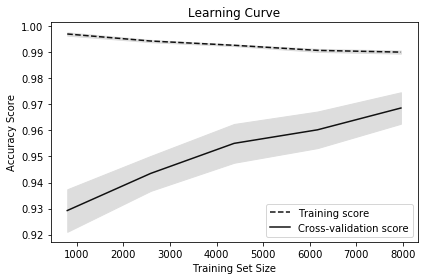

In [21]:
# plot learning curve for a toy model to determine alpha parameter
train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(
                                                            hidden_layer_sizes=(100,), 
                                                            tol=1e-5, 
                                                            random_state = 0, 
                                                            solver='adam', 
                                                            activation='tanh', 
                                                            max_iter=1000), X_train, y_train, cv=cv)
plot_learning_curve(train_sizes, train_scores, valid_scores)

**Classifier-5.2: Neural Network with 2 hidden layers**

In [22]:
# NN with 2 layers
nn2 = MLPClassifier(tol=1e-5, random_state=0, solver='adam', activation='tanh', max_iter=1000, batch_size=256)

# parameters to try
# parameters = {
#                 'hidden_layer_sizes': [(10,10),(30,30),(100,100)],
#                 'activation': ['identity', 'logistic', 'tanh', 'relu'],
#                 'alpha': [0.0001,0.001,0.01,0.1,1,10],
#                 'batch_size' : [32,64,128,256],
#                 'max_iter' : [100, 1000, 5000],
#                 'learning_rate' : [‘constant’, ‘invscaling’, ‘adaptive’]
#             }

parameters = {
                'hidden_layer_sizes': [(10,10),(30,30),(100,100)],
#                 'alpha': [0.0001,0.001,0.01,0.1,1,10],
            }

# grid search for parameters
grid = GridSearchCV(estimator=nn2, param_grid=parameters, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid.best_params_, grid.best_score_))

# prediction results
y_pred = grid.predict(X_test)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'hidden_layer_sizes': (100, 100)} with a score of 0.9681

TEST SCORES

ACCURACY: 0.9701

AUC: 0.9692

CONFUSION MATRIX:
[[ 942   38]
 [  28 1203]]

FALSE POSITIVES:
28 out of 1231 positive labels (0.0227%)

FALSE NEGATIVES:
38 out of 980 negative labels (0.0388%)

PRECISION, RECALL, F1 scores:
              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       980
           1       0.97      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



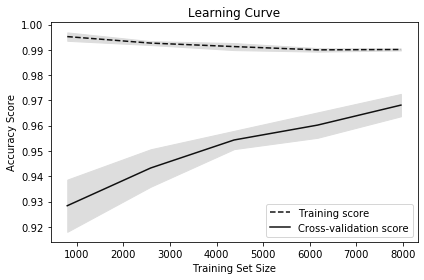

In [23]:
# plot learning curve for a toy model to determine alpha parameter
train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(
                                                            hidden_layer_sizes=(100,100), 
                                                            tol=1e-5, 
                                                            random_state = 0, 
                                                            solver='adam', 
                                                            activation='tanh', 
                                                            max_iter=1000), X_train, y_train, cv=cv)
plot_learning_curve(train_sizes, train_scores, valid_scores)